# 4-lens compound lens simulation
Our objective lens consists of four BK7 lenses. Detail of it can be found in thesis of Tiffany Harte and Peter Baranowski.

refractive index of BK7 is 1.5112 for 780 nm and 1.5195 for 532 nm. v-number is vd=64.17

In [1]:
from rayoptics.environment import *

In [2]:
def objective(wavelength, refractive_index, v_number):
    opm = OpticalModel()
    sm  = opm.seq_model
    osp = opm.optical_spec
    pm = opm.parax_model

    osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=12.5)
    osp.field_of_view = FieldSpec(osp, key=['object', 'angle'], flds=[0.])
    osp.spectral_region = WvlSpec([(780, 1.0)], ref_wl=0)

    opm.radius_mode = True

    sm.gaps[0].thi=1e10

    sm.add_surface([8000, 3.08, refractive_index, v_number])
    sm.add_surface([39.08, 5.86])
    sm.add_surface([103.29, 4.97, refractive_index,v_number])
    sm.set_stop()
    sm.add_surface([-103.29, 0.4])
    sm.add_surface([39.08, 5.12, refractive_index, v_number])
    sm.set_stop()
    sm.add_surface([-8000, 0.4])
    sm.add_surface([26, 5.07, refractive_index,v_number])
    sm.set_stop()
    sm.add_surface([78.16, 21])
    sm.add_surface([8000, 2, refractive_index, v_number])
    sm.add_surface([8000, 13])


    opm.update_model()
    return opm

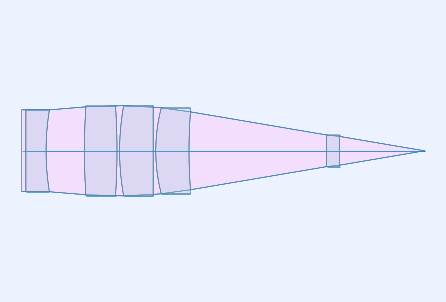

In [3]:
opm780=objective(780,1.5112,64.17)
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm780, do_draw_rays=True, do_paraxial_layout=False,
                        is_dark=False).plot()

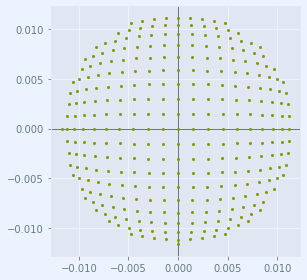

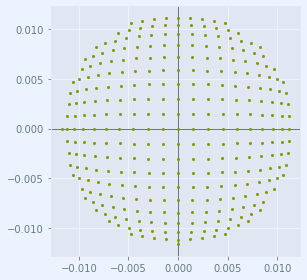

In [4]:
plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm780).plot()

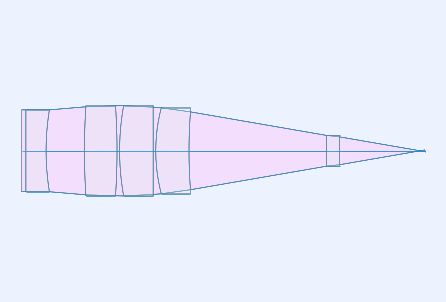

In [5]:
opm532=objective(532,1.5195,64.17)
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm532, do_draw_rays=True, do_paraxial_layout=False,
                        is_dark=False).plot()

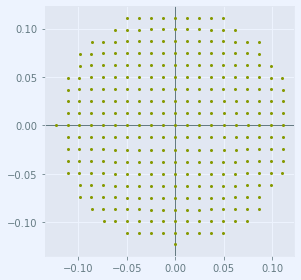

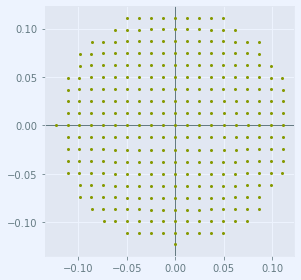

In [6]:
plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm532).plot()